In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="darkgrid"); sns.set_context('notebook')
import numpy as np

from sklearn.cluster import KMeans

from highstreets.data import make_dataset as mhsd
from highstreets.visualisation import visualise as vhsd

from dotenv import load_dotenv, find_dotenv
import os

load_dotenv(find_dotenv())

YOY_FILE  = os.environ.get("YOY_FILE")
PROFILE_FILE = os.environ.get("PROFILE_FILE")
PROJECT_ROOT = os.environ.get("PROJECT_ROOT")

#### Load mastercard spend data along with high street profiles 

In [4]:
hsp = pd.read_excel(PROFILE_FILE)
hsd_yoy = pd.read_csv(YOY_FILE, parse_dates=['week_start'])

### Setup data arrays:

In [5]:
hsd_yoy_minimal = mhsd.avg_retail_wd_we(hsd_yoy, 'yoy_')

dates_2020 = ('2020-04-15','2020-10-31')
dates_2020_full = ('2020-01-01','2020-12-31')
dates_2021 = ('2021-02-12', '2021-08-31')
dates_full = ('2020-01-01','2021-12-31')

data_2020 = mhsd.extract_data_array(hsd_yoy_minimal, dates_2020, 'txn_amt')
data_2021 = mhsd.extract_data_array(hsd_yoy_minimal, dates_2021, 'txn_amt')
data_2020_full = mhsd.extract_data_array(hsd_yoy_minimal, dates_2020_full, 'txn_amt')
data_full = mhsd.extract_data_array(hsd_yoy_minimal, dates_full, 'txn_amt')

### Run k-means on 2020, 2021, and full data separately:

In [6]:
n_clus = 3
max_iter = 50
tol = 1e-2

# 2020 data:
kmeans20 = KMeans(init='random', n_clusters=n_clus, 
    random_state=None, max_iter=max_iter, tol=tol, copy_x = True, verbose=0, n_init=10)
kmeans20.fit(np.transpose(data_2020.to_numpy()))

# 2021 data:
kmeans21 = KMeans(init='random', n_clusters=n_clus, 
    random_state=None, max_iter=max_iter, tol=tol, copy_x = True, verbose=0, n_init=10)
kmeans21.fit(np.transpose(data_2021.to_numpy()))

# full data:
kmeansfull = KMeans(init='random', n_clusters=n_clus, 
    random_state=None, max_iter=max_iter, tol=tol, copy_x = True, verbose=0, n_init=10)
kmeansfull.fit(np.transpose(data_full.to_numpy()))

KMeans(init='random', max_iter=50, n_clusters=3, tol=0.01)

## Regressions: trying to summarise trends across time

In [7]:
# Unpooled regression - fit slope and intercept independently for each high street
start_times = {'2020':'2020-04-01','2021':'2021-04-12','full':'2020-04-01'}
tvecs = {'2020':data_2020.index,'2021':data_2021.index,'full':data_full.index}
arrays = {'2020':np.transpose(data_2020.to_numpy()),'2021':np.transpose(data_2021.to_numpy()),'full':np.transpose(data_full.to_numpy())}

fit_lines = {}
reg_model={}

reg_model['2020'],fit_lines['2020'] = mhsd.get_fit_lines(start_times['2020'],tvecs['2020'],arrays['2020'], robust=False)
reg_model['2021'],fit_lines['2021'] = mhsd.get_fit_lines(start_times['2021'],tvecs['2021'],arrays['2021'], robust=False)
reg_model['full'],fit_lines['full'] = mhsd.get_fit_lines(start_times['full'],tvecs['full'],arrays['full'], robust=False)

### Plot each highstreet with lines fit to each recovery period

In [ ]:
vhsd.plot_all_profiles_full({'2020':data_2020,'2021':data_2021,'full':data_full},fit_lines)

### Sort highstreets by their 2020 mean and 2020 fit slope and plot by group

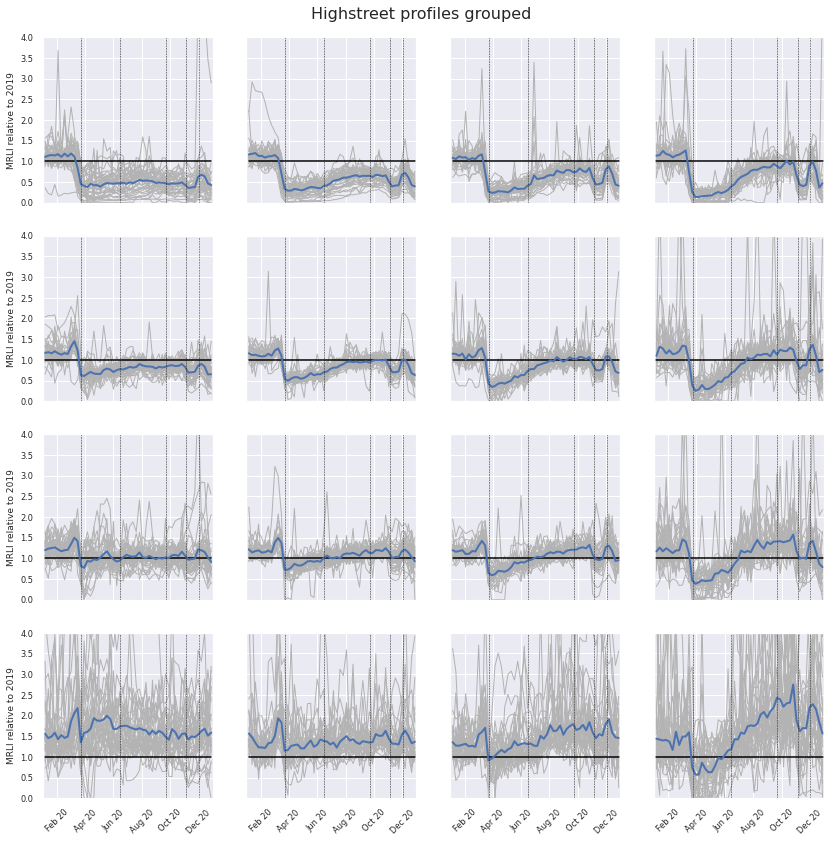

In [95]:
nb_dates = pd.to_datetime(['2020-03-24','2020-06-15','2020-09-22','2020-11-05','2020-12-02','2021-01-05','2021-04-12'])

# columns by which we will sort the highstreets (for example, slope of the best fit line to 2020 recovery and the initial hit in 2020)
#sort_cols = data_2020_full.loc['2020-04-01':'2020-04-30',:].min().to_numpy(), reg_model['2020'].coef_
sort_cols = data_2020_full.loc['2020-03-14':'2020-11-01',:].mean().to_numpy(), reg_model['2020'].coef_

# prepend mean and fit slopes to array for sorting and grouping:
plot_array = np.transpose(data_2020_full.to_numpy())
plot_tvec = data_2020_full.index
filename = '2021-sorted-by-mean-slope.pdf'

vhsd.plot_highstreets_grouped(plot_array, plot_tvec, sort_cols, nb_dates, filename, xlim=('2020-01-01','2020-12-31'))


### Sort highstreets by their 2021 mean and slope and plot in groups

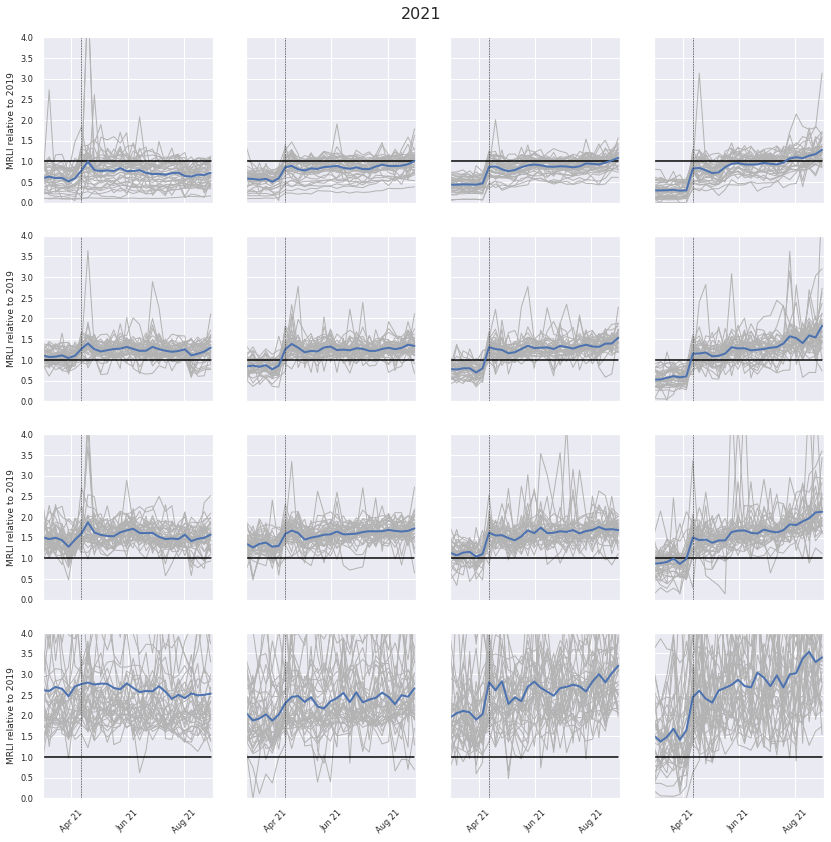

In [94]:
nb_dates = pd.to_datetime(['2020-03-24','2020-06-15','2020-09-22','2020-11-05','2020-12-02','2021-01-05','2021-04-12'])

# columns by which we will sort the highstreets (for example, slope of the best fit line to 2020 recovery and the initial hit in 2020)
#sort_cols = data_2020_full.loc['2020-04-01':'2020-04-30',:].min().to_numpy(), reg_model['2020'].coef_
sort_cols = data_2021.loc['2021-03-14':'2021-11-01',:].mean().to_numpy(), reg_model['2021'].coef_

# prepend mean and fit slopes to array for sorting and grouping:
plot_array = np.transpose(data_2021.to_numpy())
plot_tvec = data_2021.index
filename = '2021-sorted-by-mean-slope.pdf'

vhsd.plot_highstreets_grouped(plot_array, plot_tvec, sort_cols, nb_dates, filename, xlim=('2021-03-01','2021-09-01'), figure_title='2021')

### Sort highstreets by their 2020 means and slopes and plot across full period sorted into groups

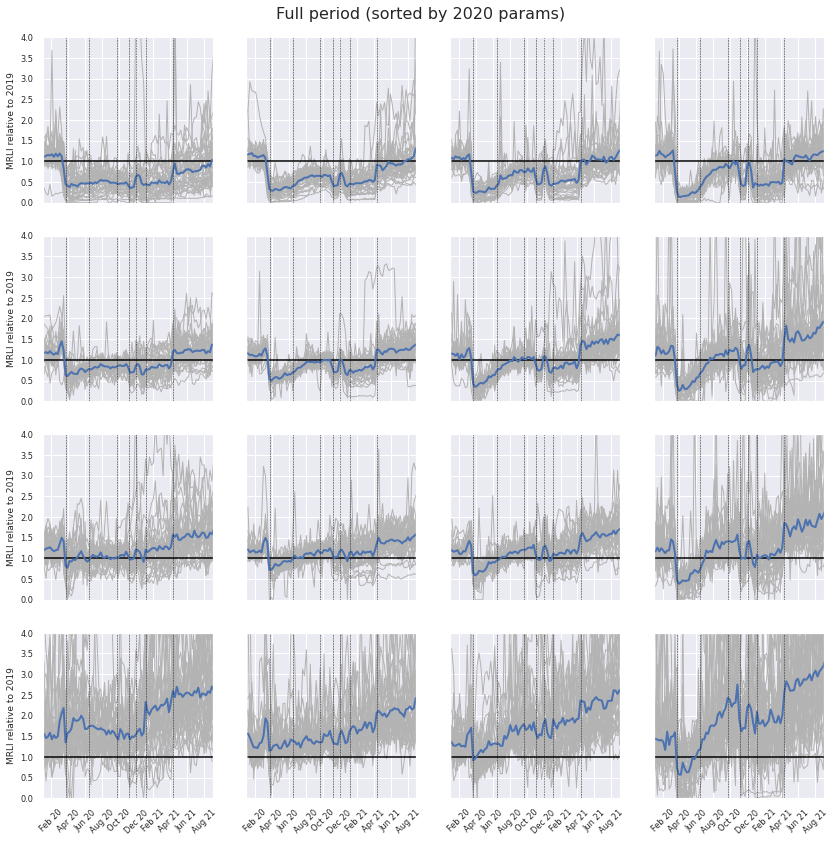

In [96]:
nb_dates = pd.to_datetime(['2020-03-24','2020-06-15','2020-09-22','2020-11-05','2020-12-02','2021-01-05','2021-04-12'])

# columns by which we will sort the highstreets (for example, slope of the best fit line to 2020 recovery and the initial hit in 2020)
#sort_cols = data_2020_full.loc['2020-04-01':'2020-04-30',:].min().to_numpy(), reg_model['2020'].coef_
sort_cols = data_2020_full.loc['2020-03-14':'2020-11-01',:].mean().to_numpy(), reg_model['2020'].coef_

# prepend mean and fit slopes to array for sorting and grouping:
plot_array = np.transpose(data_full.to_numpy())
plot_tvec = data_full.index
filename = 'full-sorted-by-2020-mean-slope.pdf'

vhsd.plot_highstreets_grouped(plot_array, plot_tvec, sort_cols, nb_dates, filename, xlim=('2020-01-01','2021-09-01'), figure_title='Full period (sorted by 2020 params)')

### Append 2020 & 2021 means and fit lines to High Street Profiles for further analysis

In [175]:
stats = mhsd.append_profile_features(hsp, data_2020_full, data_2021, reg_model)
stats.head()

,,mean 2020,mean 2021,slope 2020,slope 2021,total_number_of_addresses,total_number_of_residential_addresses,total_number_of_commercial_addresses,percentage of commercial addresses (%),total_number_of_offices,precentage of residential addresses (%),...,WorkAgePopulation,Employees,pattern_2020,pattern_2021,all_pandemic,RECODE,Cnt_highstreet,Sum_y2021_10wd,Sum_y2019_07wd,pc_chng
highstreet_id,highstreet_name,,,,,,,,,,,,,,,,,,,,,
1,"Pimlico Road, Belgravia",0.405576,0.93878,0.005088,0.006513,13598.0,10762.0,1640.0,12.060597,1254.0,79.143992,...,14959.0,33200.0,struggling,adaptable,struggling,NaN,7.0,8880.526284,7348.334699,120.850868
2,"Queensway, Westbourne Grove, Bayswater",0.353955,0.66506,0.002212,0.003251,16692.0,13300.0,1670.0,10.004793,822.0,79.678888,...,16161.0,9925.0,struggling,struggling,struggling,NaN,9.0,9776.708641,7354.840627,132.928899
4,"Mitcham Road, Croydon.",1.342439,2.94738,-0.001391,0.006037,2118.0,1748.0,141.0,6.657224,8.0,82.530689,...,2135.0,2725.0,adaptable,resilient,resilient,NaN,4.0,1330.350255,1141.060698,116.588912
5,"Bridge Road, Chessington.",0.874485,1.32370,0.003298,0.000814,3942.0,3397.0,334.0,8.472856,137.0,86.174531,...,5845.0,2800.0,struggling,adaptable,adaptable,NaN,4.0,2689.207536,2159.100879,124.552195
6,"Brighton Road, Purley Oaks.",0.859606,1.13984,0.004919,0.001277,4840.0,4071.0,377.0,7.789256,60.0,84.111570,...,7296.0,3050.0,adaptable,adaptable,adaptable at risk,NaN,4.0,3270.890635,2693.808580,121.422534


array([[<AxesSubplot:xlabel='mean 2020', ylabel='mean 2020'>,
        <AxesSubplot:xlabel='slope 2020', ylabel='mean 2020'>,
        <AxesSubplot:xlabel='mean 2021', ylabel='mean 2020'>,
        <AxesSubplot:xlabel='slope 2021', ylabel='mean 2020'>,
        <AxesSubplot:xlabel='total_number_of_commercial_addresses', ylabel='mean 2020'>,
        <AxesSubplot:xlabel='Sum_y2019_07wd', ylabel='mean 2020'>],
       [<AxesSubplot:xlabel='mean 2020', ylabel='slope 2020'>,
        <AxesSubplot:xlabel='slope 2020', ylabel='slope 2020'>,
        <AxesSubplot:xlabel='mean 2021', ylabel='slope 2020'>,
        <AxesSubplot:xlabel='slope 2021', ylabel='slope 2020'>,
        <AxesSubplot:xlabel='total_number_of_commercial_addresses', ylabel='slope 2020'>,
        <AxesSubplot:xlabel='Sum_y2019_07wd', ylabel='slope 2020'>],
       [<AxesSubplot:xlabel='mean 2020', ylabel='mean 2021'>,
        <AxesSubplot:xlabel='slope 2020', ylabel='mean 2021'>,
        <AxesSubplot:xlabel='mean 2021', ylabel='mean 2

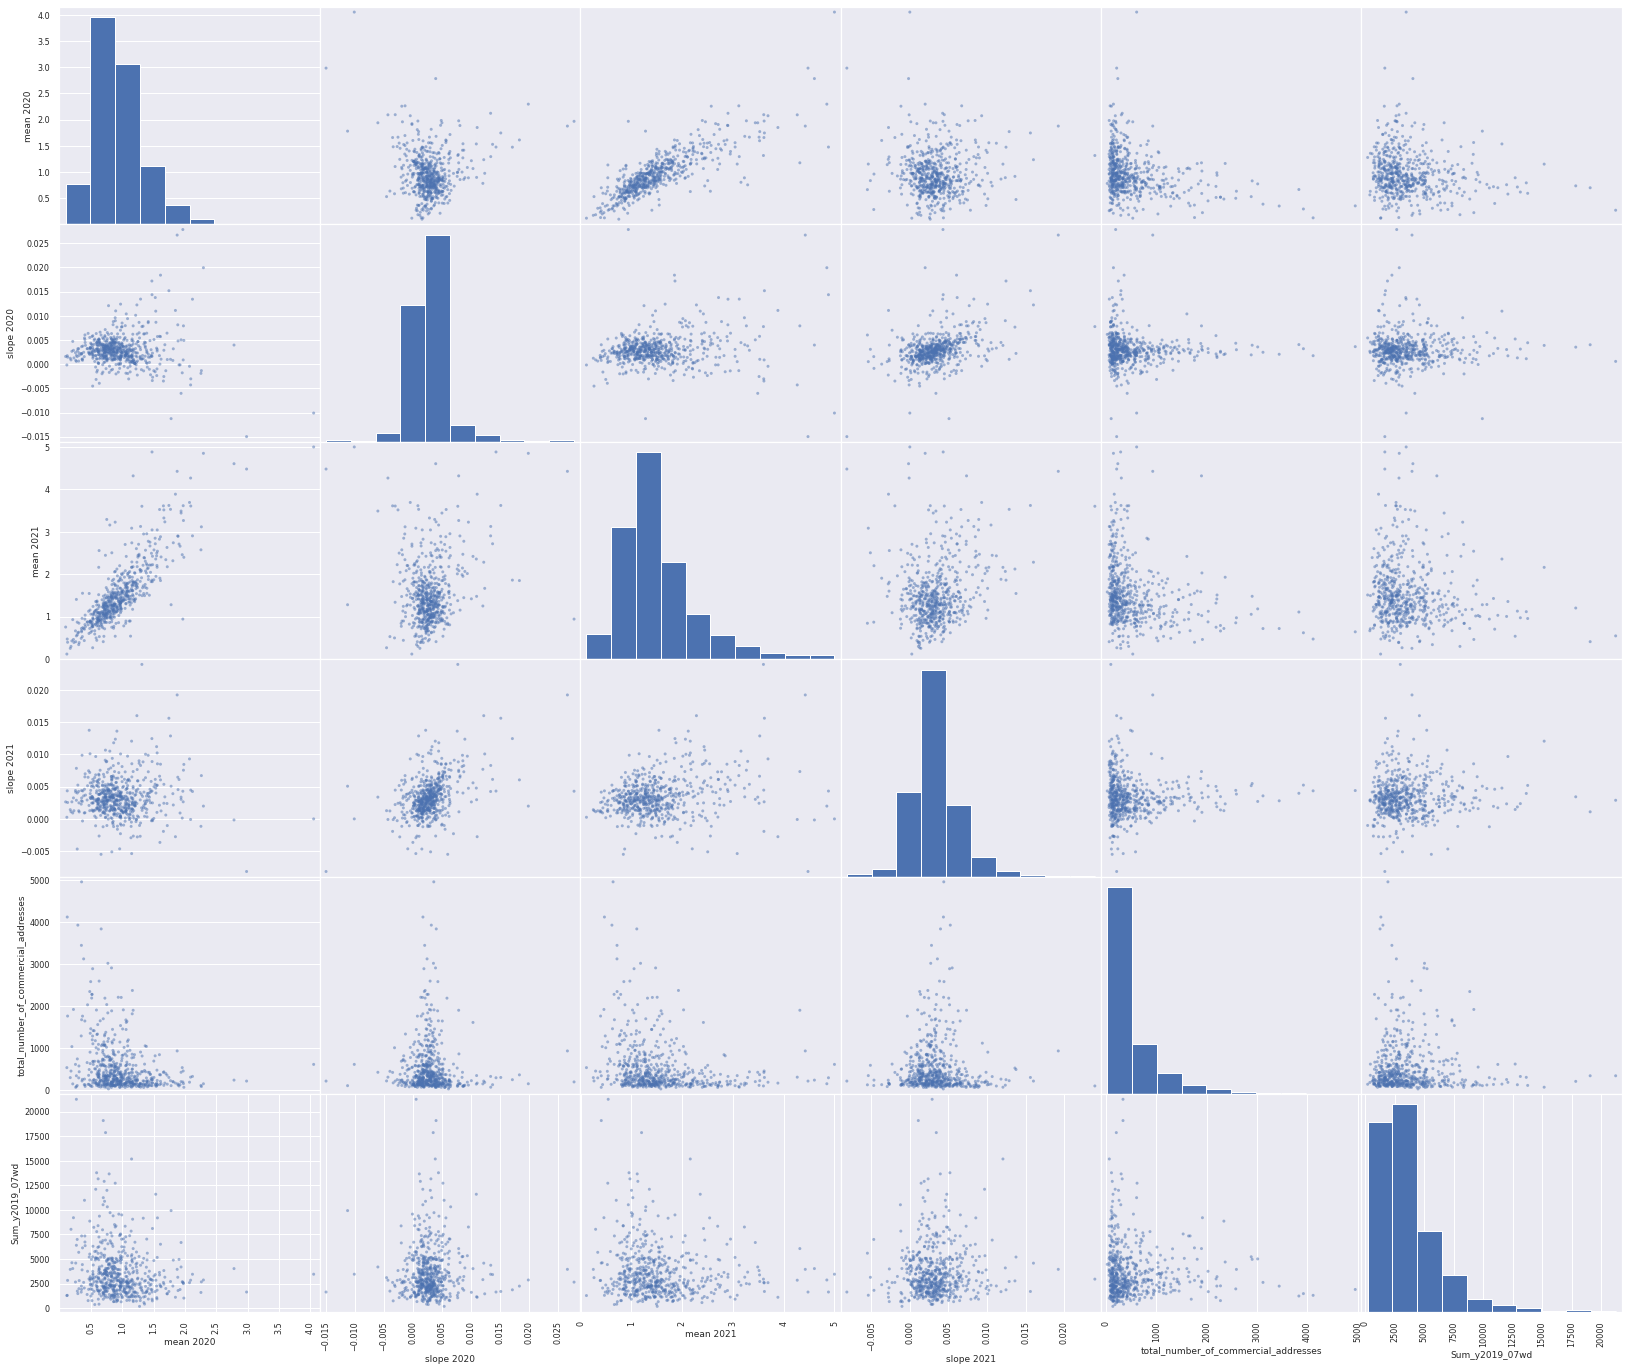

In [176]:
vars = ['mean 2020','slope 2020','mean 2021','slope 2021','total_number_of_commercial_addresses','Sum_y2019_07wd']
pd.plotting.scatter_matrix(stats[vars], figsize=(28,24))
filename = 'stats-scatter-matrix.pdf'
plt.savefig(PROJECT_ROOT + '/reports/figures/' + filename)